<a href="https://colab.research.google.com/github/MathMachado/DSWP/blob/master/Notebooks/Linear%20Models%20for%20Regression%20%26%20Classification%20(Regularization).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Modelos de Regressão com Regularization para Classificação e Regressão

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Regressão Linear Simples (usando OLS - Ordinary Least Squares)

* Features X: p variáveis independentes, sendo uma matriz de dimensão nxp;
* Variável Target/Dependente representada por y;
* Relação entre X e y é representado pela equação abaixo, onde $w_{i}$ representa os pesos de cada coeficiente e $w_{0}$ representa o intercepto.

<img src="https://github.com/awantik/machine-learning-slides/blob/master/lm1.PNG?raw=true" width="300">

* Soma de Quadrados dos Resíduos (RSS) - Soma de Quadrados das diferenças entre os valores observados e preditos.

<img src="https://github.com/awantik/machine-learning-slides/blob/master/lm2.PNG?raw=true" width="500">

# Exemplo
* n_features - número de features a serem considerados;
* noise - desvio da linha reta;
* n_samples - número de amostras.

In [0]:
from sklearn.datasets import make_regression
X, y = make_regression(n_features= 1, noise= 10, n_samples=1000)

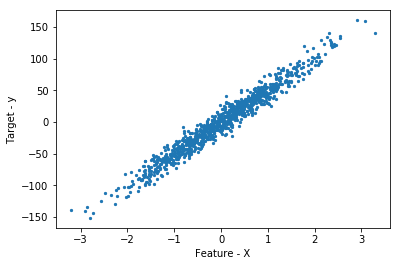

In [0]:
plt.xlabel('Feature - X')
plt.ylabel('Target - y')
plt.scatter(X,y,s=5)

In [0]:
# Instanciar
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

![X_y](https://raw.githubusercontent.com/MathMachado/Python_RFB/master/Material/Architecture.png?token=AGDJQ63GQIC52S4YYQFK7CS5QNEBI)

## Parâmetros do algoritmo:
* fit_intercept - Indica se o intercepto $w_{0}$ deve ou não ser ajustado. Se os dados estão normalizados, então não faz sentido ajustar o intercepto $w_{0}$

* normalize - $X$ será automaticamente normalizada (subtrai a média e divide pelo desvio-padrão);

## Atributos do modelo de Machine Learning para Regressão
* coef - peso/fator de cada variável independente do modelo de ML;

* intercepto $w_{0}$ - intercepto ou viés de $y$f;

## Funções para ajuste do ML:
* fit - treina o modelo com as matrizes $X$ e $y$;
* predict - Uma vez que o modelo foi treinado, para um dado $X$, use $y$ para calcular os valores preditos de $y$ (y_pred).

<hr/>

In [0]:
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# Coeficiente do modelo de ML - Neste caso, observe que temos uma única variável preditora
lr.coef_

array([50.16098396])

In [0]:
lr.intercept_

0.028048140075675243

## Prever/estimar usando o modelo treinado

In [0]:
# Calcula y_pred - os valores preditos de y
y_pred = lr.predict(X)

> No gráfico a seguir
* Pontos coloridos de azul - representam os pontos/dados observados;
* Pontos coloridos em laranja - representam os pontos/dados previstos/estimados através do modelo de ML; 

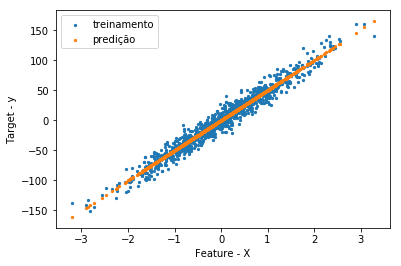

In [0]:
plt.scatter(X, y, s=5, label='treinamento')
plt.scatter(X, y_pred,s=5, label='predição')
plt.xlabel('Feature - X')
plt.ylabel('Target - y')
plt.legend()
plt.show()

# Limitações do OLS:
* Impactado por Outliers;
* Multicolinearidade; 
* Heterocedasticidade - apresenta-se como uma forte dispersão dos dados em torno de uma reta;

* <a href="http://www.clockbackward.com/2009/06/18/ordinary-least-squares-linear-regression-flaws-problems-and-pitfalls/">References</a>

# Regularized Regression Methods 
## Ridge Regression
> Reduz a complexidade do modelo através do uso de todas as variáveis de $X$, mas penalizando os coeficientes $w_{i}$ quando estiverem muito longe de zero, forçando-os a serem pequenos de maneira contínua. Dessa forma, diminuímos a complexidade do modelo enquanto mantemos todas as variáveis no modelo.
* Menor impacto dos outliers.

### Exemplo

In [0]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=.1)
lr = LinearRegression()
ridge.fit([[0, 0], [0, 0], [1, 1]],  [0, .1, 1])
lr.fit([[0, 0], [0, 0], [1, 1]],  [0, .1, 1])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
ridge.coef_

array([0.44186047, 0.44186047])

In [0]:
lr.coef_

array([0.475, 0.475])

In [0]:
outliers = y[950:] - 600

In [0]:
import numpy as np
y_Out = np.append(y[:950],outliers)

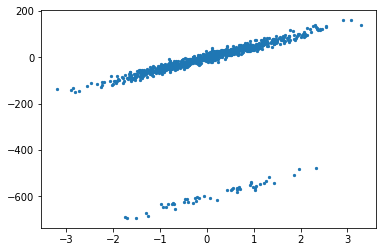

In [0]:
plt.scatter(X,y_Out,s=5)

In [0]:
lr = LinearRegression()
lr.fit(X,y_Out)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred_Out = lr.predict(X)

Text(0.5, 1.0, 'Linear Regression')

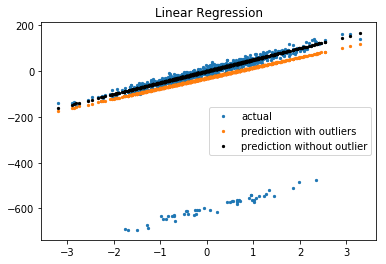

In [0]:
plt.scatter(X,y_Out,s=5,label='actual')
plt.scatter(X,y_pred_Out,s=5,label='prediction with outliers')
plt.scatter(X, y_pred,s=5,c='k', label='prediction without outlier')
plt.legend()
plt.title('Linear Regression')

In [0]:
lr.coef_

array([45.29568019])

In [0]:
ridge = Ridge(alpha=1000)

In [0]:
ridge.fit(X, y_Out)

Ridge(alpha=1000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [0]:
y_pred_ridge = ridge.predict(X)

Text(0.5, 1.0, 'Linear Regression')

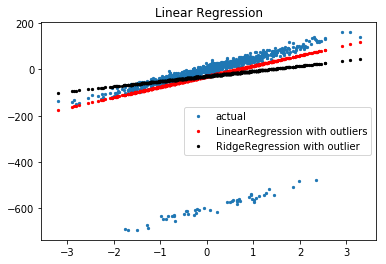

In [0]:
plt.scatter(X,y_Out,s=5,label='actual')
plt.scatter(X,y_pred_Out,s=5, c='r' ,label='LinearRegression with outliers')
plt.scatter(X,y_pred_ridge,s=5,c='k', label='RidgeRegression with outlier')
plt.legend()
plt.title('Linear Regression')

In [0]:
ridge.coef_

array([22.15093464])

## Efeito de $\alpha$ na Regressão Ridge
### Exemplo

In [0]:
X, y, w = make_regression(n_samples=10, n_features=10, coef=True,
                          random_state=1, bias=3.5)

In [0]:
w

array([80.71051956, 10.74941291, 38.78606441, 13.64552257,  5.99176895,
       86.35418546, 12.13434557,  4.45518785, 74.71216427, 55.6240234 ])

# Lasso
* Reduz overfitting;
* Se encarrega do Feature Selection, pois descarta variáveis altamente correlacionadas.

In [0]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=.1)
lasso.fit([[0, 0], [0, 0], [1, 1]],  [0, .1, 1])

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
lasso.coef_

array([0.5, 0. ])

Observe acima que o segundo coeficiente foi estimado como 0 e, desta forma, podemos excluí-lo do ML.

# Elastic Net  
* Combina o poder de Ridge e LASSO;
* Remove variáveis de pouco poder preditivo (LASSO) ou as penaliza (Ridge).

In [0]:
from sklearn.linear_model import ElasticNet
en = ElasticNet(alpha=.1)

In [0]:
en.fit([[0, 0], [0, 0], [1, 1]],  [0, .1, 1])

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
en.coef_

array([0.32589556, 0.32579954])

# Exemplo completo: Ridge
* Adaptado de [Ridge and Lasso Regression: A Complete Guide with Python Scikit-Learn](https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b)

In [0]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

In [0]:
boston=load_boston()
df_Boston=pd.DataFrame(boston.data,columns=boston.feature_names)

In [0]:
X= boston.data
y= boston.target

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2,random_state= 20111974)

In [0]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# maior alpha --> mais restrição aos coeficientes; 
# Menor alpha --> mais generalização, e Ridge se assemelha da OLS
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [0]:
# MSE
rr_model=(mean_squared_error(y_true= y_train, y_pred= rr.predict(X_train)))
print(rr_model)

23.94639697817076


In [0]:
rr100 = Ridge(alpha=100)
rr100.fit(X_train, y_train)
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
Ridge_train_score = rr.score(X_train,y_train)

In [0]:
# MSE
rr100_model=(mean_squared_error(y_true= y_train, y_pred= rr100.predict(X_train)))
print(rr100_model)

26.4601050898885


In [0]:
Ridge_test_score = rr.score(X_test, y_test)
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)
print("linear regression train score:", train_score)
print("linear regression test score:", test_score)
print("ridge regression train score low alpha:", Ridge_train_score)
print("ridge regression test score low alpha:", Ridge_test_score)
print("ridge regression train score high alpha:", Ridge_train_score100)
print("ridge regression test score high alpha:", Ridge_test_score100)

linear regression train score: 0.724706945377402
linear regression test score: 0.8054678209323711
ridge regression train score low alpha: 0.7247060587449579
ridge regression test score low alpha: 0.8055723687508576
ridge regression train score high alpha: 0.6958078234960237
ridge regression test score high alpha: 0.7923431994788641


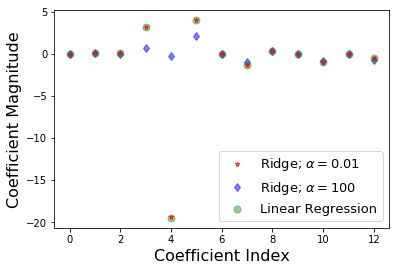

In [0]:
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

In [0]:
from sklearn.metrics import mean_squared_error
rr_model=(mean_squared_error(y_true= y, y_pred=regression.predict(X)))
print(first_model)

# Exemplo completo - Elastic Net

In [0]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
elastic= ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [0]:
search.fit(X, y)
search.best_params_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'alpha': 0.001, 'l1_ratio': 0.6}

In [0]:
elastic= ElasticNet(normalize=True,alpha=0.001,l1_ratio=0.6)
elastic.fit(X,y)
second_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
print(second_model)

23.73274644138164


# Exercícios
* Com grupos de até 4 pessoas, ajuste modelos de Regressão Linear aos dados a seguir:

# Exercício 1 - Breast Cancer
> Aqui, a variável-target $y$ é categórica. Compare os resultados usando Ridge, LASSO, Elastic Net e normal.

* Experimente:
    * Lasso(alpha=0.01, max_iter=10e5);
    * Lasso(alpha=0.0001, max_iter=10e5);
    * Ridge(alpha=0.01);
    * Ridge(alpha=100);

In [0]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
X = cancer.data
y = cancer.target